# Admission Chances Prediction¶
### Understanding the Problem Statement
#### Life cycle of Machine learning Project
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model
### 1) Problem statement.
- This dataset comprises with the Scores of various Exams, Including University Ranking, CGPA, Chances of Admission in University.
- If user can predict the Chances of Admission to the university.
- Prediction results can be used to give outcomes based on Different Exam Scores and University Ranking.
### 2) Data Collection.
- The Dataset is collected from GitHub.
- The data consists of 9 column and 500 rows.
#### 2.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [38]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [39]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

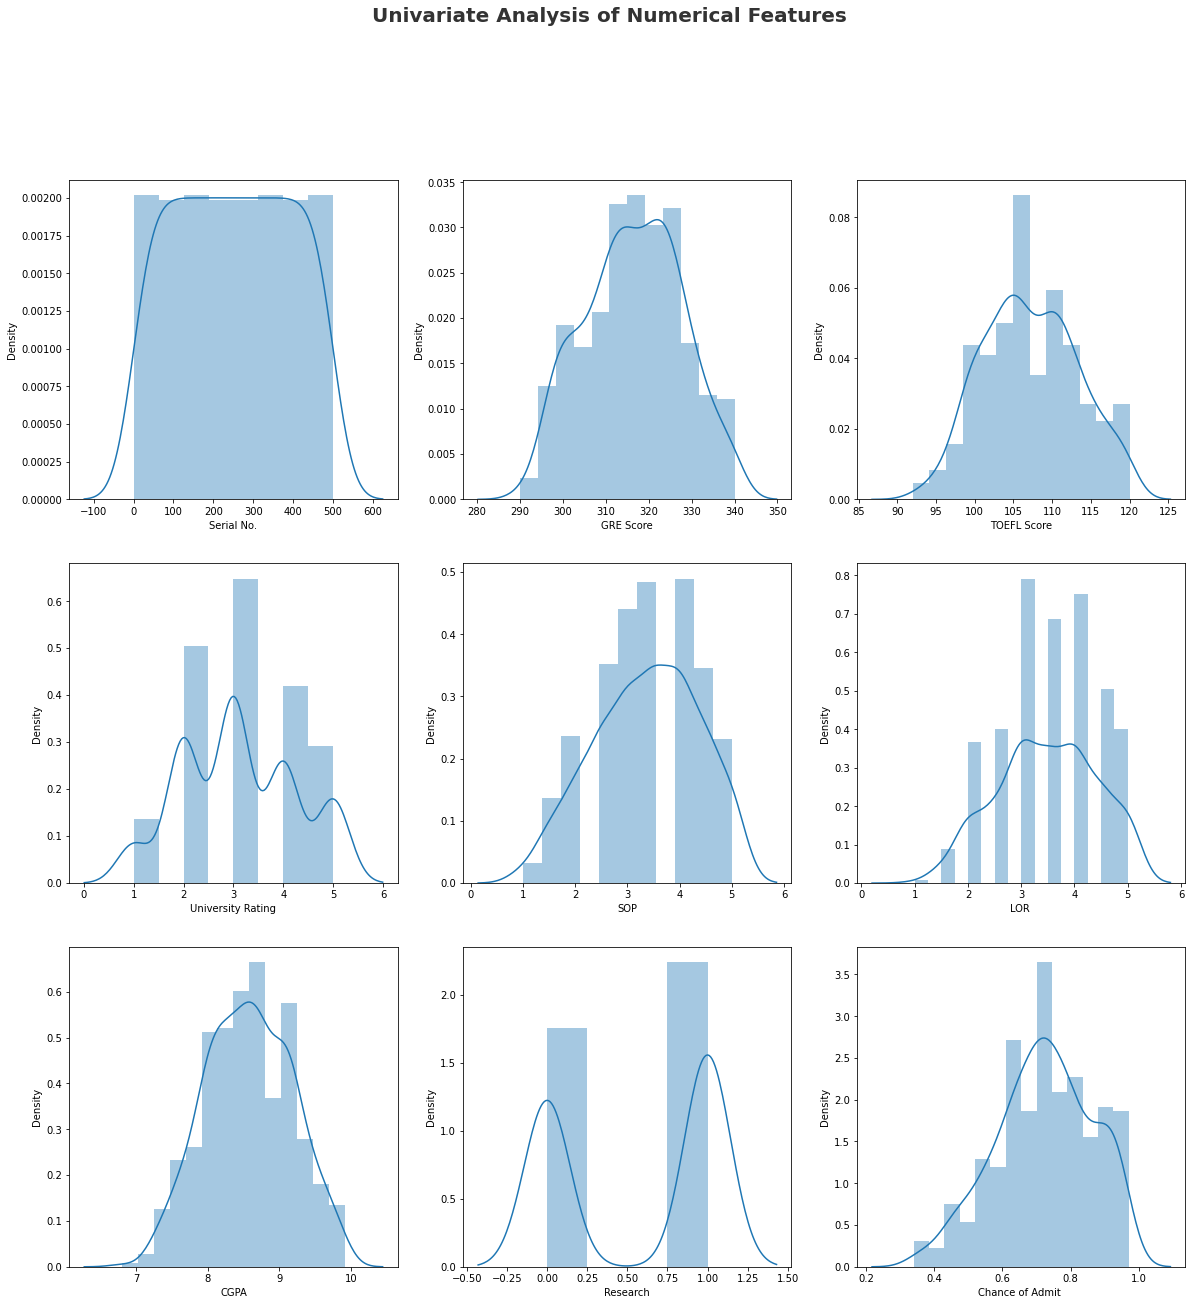

In [6]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=data[data.columns[i]])
    plt.xlabel(data.columns[i])

<AxesSubplot:>

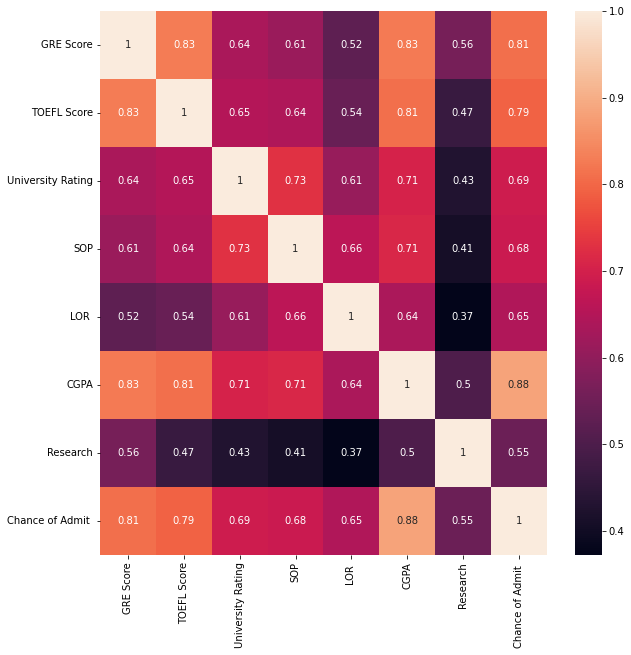

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

#### Report
All the data points shows postive correlation with Chance of Admit. Hence taking all the features as independent variable and Chance of Admit as Dependent variable.

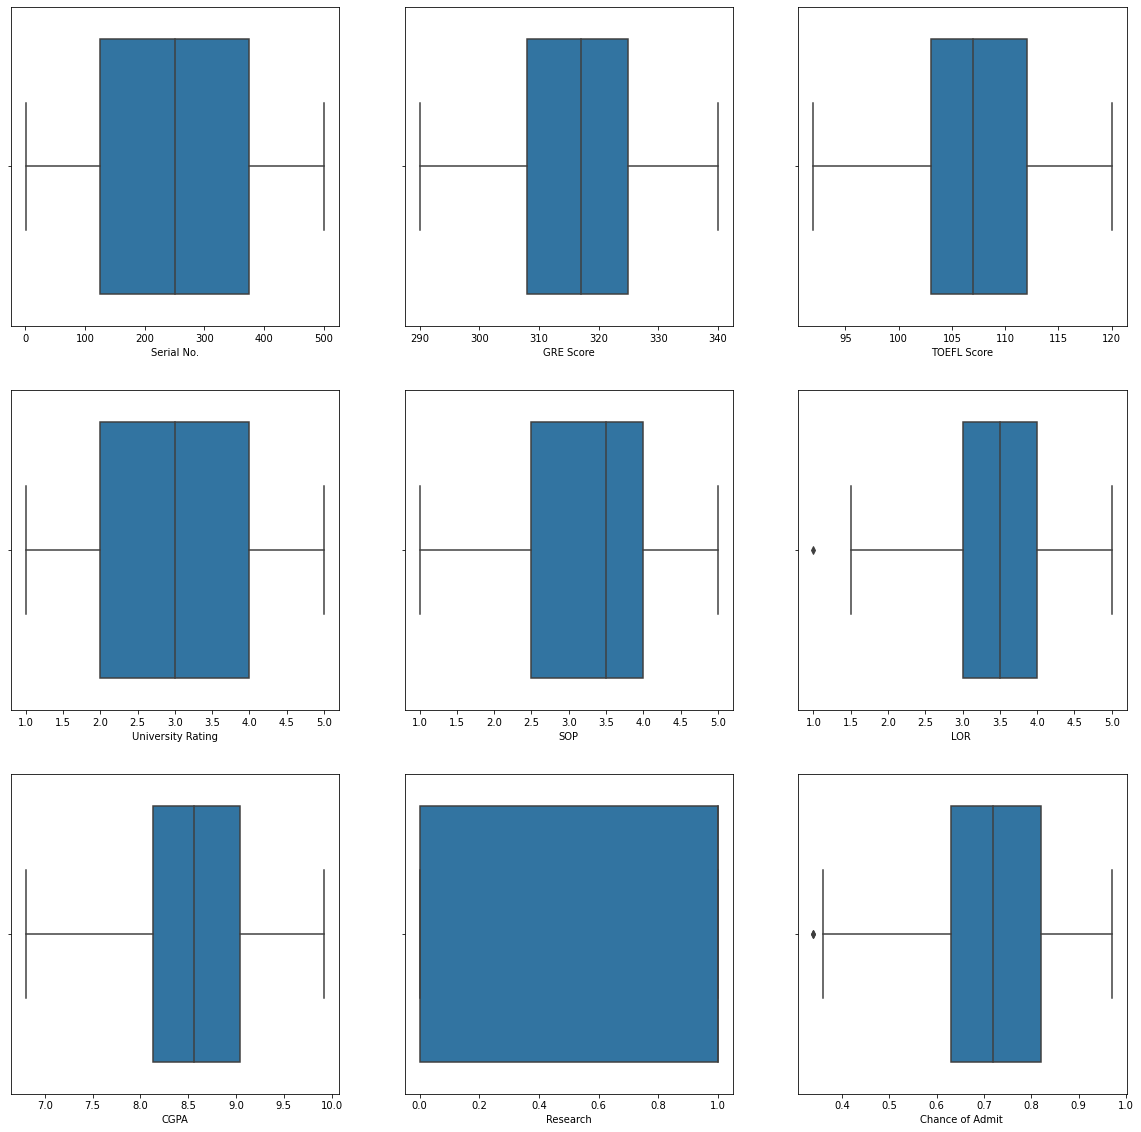

In [8]:
plt.figure(figsize=(20, 20))
for i in range(0,len(data.columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[data.columns[i]])
    plt.xlabel(data.columns[i])

#### Report
- There are only few Outliers with only less margin from the quartiles which can be ignored.

In [9]:
data.drop("Serial No.",axis=1,inplace=True)

In [10]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
X=data.drop("Chance of Admit ",axis=1)

In [13]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [14]:
y=data['Chance of Admit ']

In [40]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

#### Train Test and Splitting the data
- used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()
ss.fit(X_train)

StandardScaler()

In [20]:
X_train_trans=ss.transform(X_train)

In [21]:
X_test_trans=ss.transform(X_test)

### SVR
- Support Vector Regression is used for predicting the numercal values with help of best fit line and Hyperplane or marginal plane. The model can accept the margin of error for the data points which in the Epsilon(E) or with in the two marginal plane.

In [24]:
from sklearn.svm import SVR
model=SVR()

In [25]:
model.fit(X_train_trans,y_train)

SVR()

In [28]:
model.score(X_train_trans,y_train)

0.7757519357301843

In [30]:
svr_pred=model.predict(X_test_trans)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
mse=mean_squared_error(y_test,svr_pred)
mse

0.004940947816722295

In [35]:
mae=mean_absolute_error(y_test,svr_pred)
mae

0.05758218406189208

In [37]:
r2score=r2_score(y_test,svr_pred)
r2score

0.7601877598637249